<a href="https://colab.research.google.com/github/bttrung/CVND-udacity-facebook-scholarship/blob/master/convolutional-filters-edge-detection/13_High_and_Low_Pass_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

%matplotlib inline

!git clone -l -s https://github.com/bttrung/CVND-udacity-facebook-scholarship.git
%cd cloned-repo
!ls

Cloning into 'CVND-udacity-facebook-scholarship'...
remote: Enumerating objects: 559, done.
remote: Counting objects: 100% (559/559), done.
remote: Compressing objects: 100% (549/549), done.
remote: Total 559 (delta 56), reused 435 (delta 6), pack-reused 0
Receiving objects: 100% (559/559), 58.20 MiB | 27.78 MiB/s, done.
Resolving deltas: 100% (56/56), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content
CVND-udacity-facebook-scholarship  sample_data


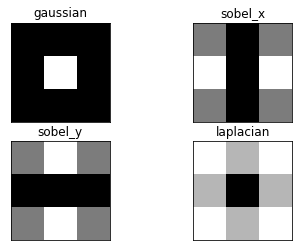

In [4]:
# visualize the frequencies that these filters block out by taking a look at their fourier transforms

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

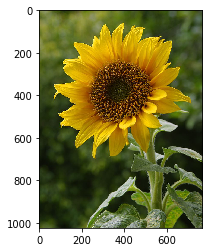

In [5]:
img_url = 'CVND-udacity-facebook-scholarship/convolutional-filters-edge-detection/images/sunflower.jpg'
image = mpimg.imread(img_url)
plt.imshow(image)

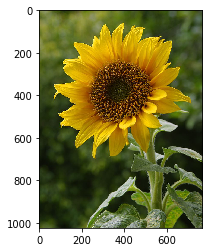

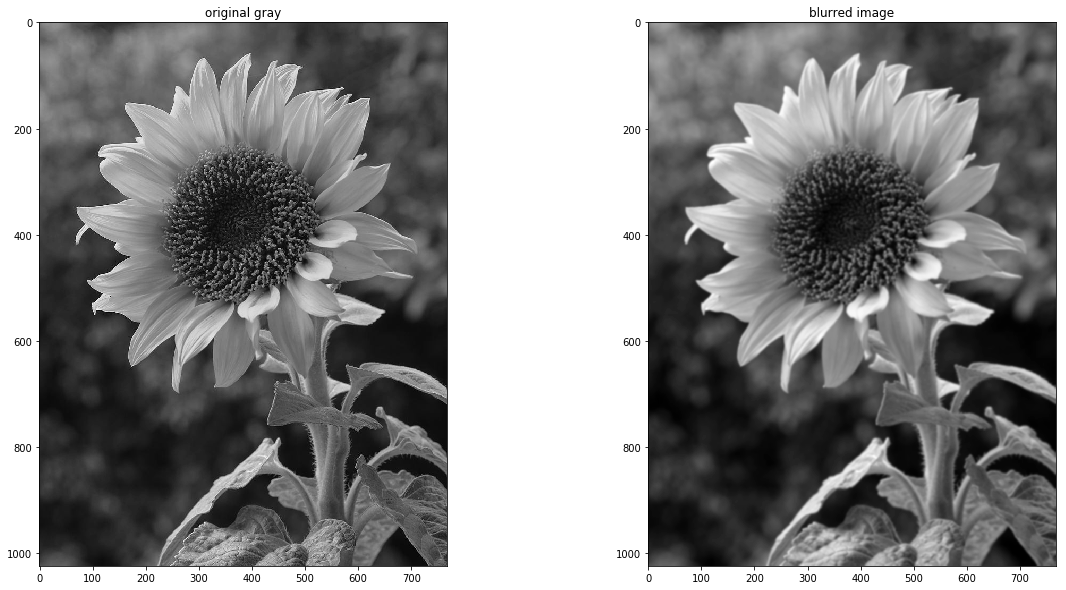

In [9]:
# Make a copy of the image
image_copy = np.copy(image)

plt.imshow(image_copy)

# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')



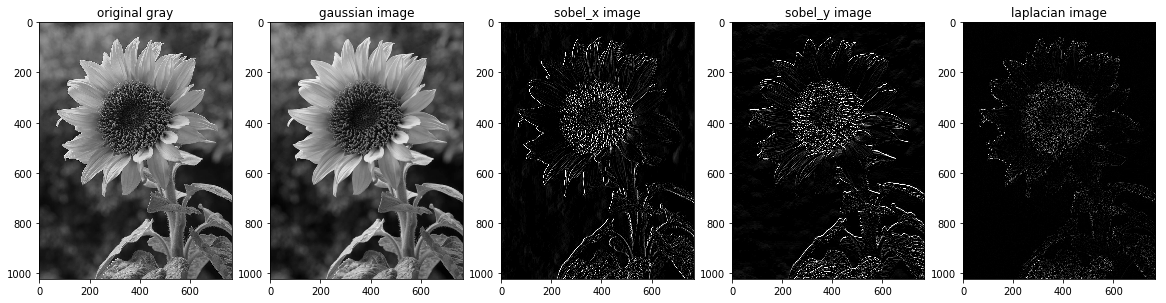

In [16]:
gaussian_image = cv2.filter2D(gray, -1, gaussian)
sobel_x_image = cv2.filter2D(gray, -1, sobel_x)
sobel_y_image = cv2.filter2D(gray, -1, sobel_y)
laplacian_image = cv2.filter2D(gray, -1, laplacian)

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('gaussian image')
ax2.imshow(gaussian_image, cmap='gray')

ax3.set_title('sobel_x image')
ax3.imshow(sobel_x_image, cmap='gray')

ax4.set_title('sobel_y image')
ax4.imshow(sobel_y_image, cmap='gray')

ax5.set_title('laplacian image')
ax5.imshow(laplacian_image, cmap='gray')